# With this notebook we will:
## 1. Install packages needed for root
## 2. Download a binary root that compiled in google drive "colaboratory" environement
## 3. Modify the PATH in order to tell python where to look for pyROOT
## 4. Finally, test ROOT installation with a simple example

##### Author: Jose Ruiz
##### Maintainer: Jose Ruiz
##### Developed at: Universidad de Antioquia


### 1. Install packages needed for root

In [1]:
!apt-get install git dpkg-dev cmake g++ gcc binutils libx11-dev libxpm-dev libxft-dev libxext-dev tar gfortran subversion

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libxext-dev is already the newest version (2:1.3.3-1).
libxft-dev is already the newest version (2.3.2-1).
libxpm-dev is already the newest version (1:3.5.12-1).
subversion is already the newest version (1.9.7-4ubuntu1).
binutils is already the newest version (2.30-21ubuntu1~18.04.2).
cmake is already the newest version (3.10.2-1ubuntu2.18.04.1).
dpkg-dev is already the newest version (1.19.0.5ubuntu2.3).
g++ is already the newest version (4:7.4.0-1ubuntu2.3).
gcc is already the newest version (4:7.4.0-1ubuntu2.3).
gfortran is already the newest version (4:7.4.0-1ubuntu2.3).
git is already the newest version (1:2.17.1-1ubuntu0.4).
libx11-dev is already the newest version (2:1.6.4-3ubuntu0.2).
tar is already the newest version (1.29b-2ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 33 not upgraded.


### 2. Mount the drive to get the root binary and untar it 

In [2]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/Shared drives/PyROOT_in_Google/"

BasicAnalysis.ipynb	  HistogrammingInROOT.ipynb
BasicPyROOTExample.ipynb  monje-a-lo-bonzo-blanco-y-negro.png
Chi2Fitting.ipynb	  piano-C5.wav
Data5.root		  Random2DHistos
DatosParcial2		  root_build_google_yikes.tar
DatosResonancia.root	  Temporal
FFT_imagen.ipynb	  TrimmedTree.root
FFT.ipynb		  TTreeExcercise.ipynb
FLUTEMI.WAV


In [4]:
!tar -xf /content/drive/Shared\ drives/PyROOT_in_Google/root_build_google_yikes.tar

^C


In [5]:
!ls -ltrh

total 12K
drwxr-xr-x 44 root root 4.0K Sep 20  2018 root_build
drwxr-xr-x  1 root root 4.0K Nov  6 16:17 sample_data
drwx------  4 root root 4.0K Nov 18 02:26 drive



### 3. Modify the PATH in order to tell python where to look for pyROOT


In [0]:
import sys
sys.path.append("/content/root_build/")
sys.path.append("/content/root_build/bin/")
sys.path.append("/content/root_build/include/")
sys.path.append("/content/root_build/lib/")

In [2]:

import math
import ROOT
from ROOT import gROOT 

Welcome to JupyROOT 6.14/04


In [3]:
DataChain=ROOT.TChain("SystemTree")
DataChain.Add("/content/drive/Shared drives/PyROOT_in_Google/DatosParcial2/N1017225699.root")

1

In [4]:
NumberOfEventsToCheck=DataChain.GetEntries()
print("el archivo tiene",NumberOfEventsToCheck, " eventos")

el archivo tiene 80000  eventos


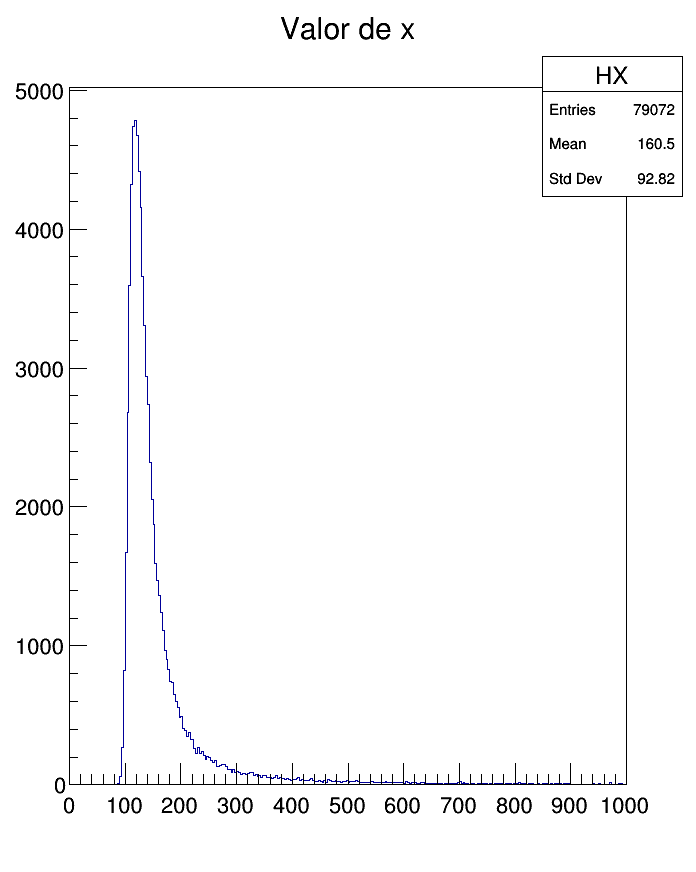

In [5]:
HX = ROOT.TH1F( 'HX', 'Valor de x', 300, 0, 1000 ) #Hsitograma de Root que mostrará la frecuencia de los datos
X=[]

for entry in DataChain:
  xval=entry.x
  if xval<=1000:
    X.append(xval)
    HX.Fill(xval)

c1 = ROOT.TCanvas( 'c1', 'The FillRandom example', 200, 10, 700, 900 )
c1.SetFillColor( 0 )
HX.Draw()
c1.Update()
ROOT.gROOT.GetListOfCanvases().Draw() 

In [6]:
print("el numero de bins es:", HX.GetNbinsX())
HT=[]

for i in range(1,HX.GetNbinsX()+1):
  #print(i)
  #print( HX.GetBinContent(i))
  HT.append(HX.GetBinContent(i))

#print(HT)
#len(HT)


el numero de bins es: 300


In [7]:
HX.Fit("landau",'S')

 FCN=293.835 FROM MIGRAD    STATUS=CONVERGED     286 CALLS         287 TOTAL
                     EDM=6.81158e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.66054e+04   1.42233e+02   7.94659e-01  -5.41861e-07
   2  MPV          1.19883e+02   7.73390e-02   5.15792e-04   1.42630e-03
   3  Sigma        9.98872e+00   4.03200e-02   2.09753e-06  -4.31497e-01


In [0]:
#This creates a function of variable x with 2 parameters. 
'''

Double_t TMath::Landau	(	Double_t 	x,
Double_t 	mu = 0,
Double_t 	sigma = 1,
Bool_t 	norm = kFALSE 
)	
'''

# Definicion de la distribucion de Landau utilizando las funciones predefinidas en Root
LD = ROOT.TF1('LD',"TMath::Landau(x,[0],[1])",0,1000)

# inicializacion de los parametro
LD.SetParameters(120,10)

#LD.Draw('same L')
#c1.Update()
#from ROOT import gROOT 
#gROOT.GetListOfCanvases().Draw()

In [0]:
#TH1F("hfix","hfix title",nbins,xlow,xup)

HisPru = ROOT.TH1F( 'HisPru', 'Histograma de prueba', 300, 0, 1000 ) # histograma para visualzar la distribución de landau LD
HisPru.FillRandom("LD",79000) # se genera un Histograma con la funcion FillRandom de root la cual sigue una distribucion de Landau 


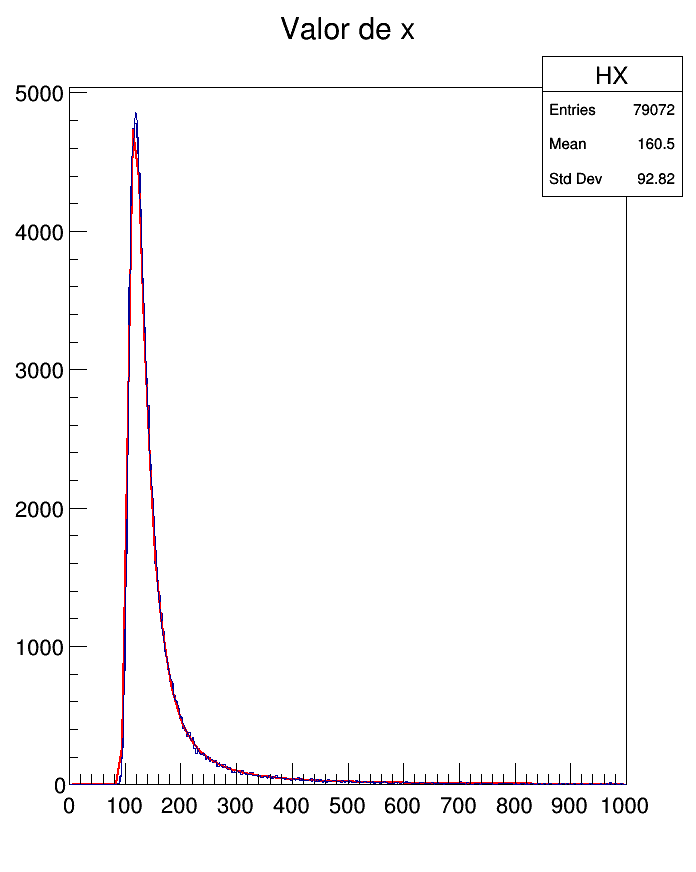

In [10]:
HisPru.Draw('same AC')
c1.Update()
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()
c1.Update()

# Bloque de codigo que generará una distribucion con el Algoritmo Metropolis

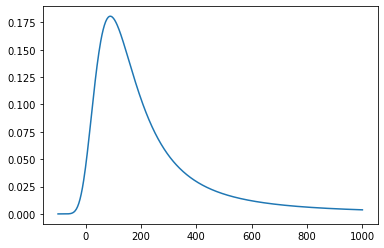

In [11]:
import numpy as np 
from random import random
from numpy.random import normal
import matplotlib.pyplot as plt

# funcion de distribucion de Landau que recibe como parametros mu y c 
def P(x,mu,c):
  #TF1 f1("f1",",0,1); f1.SetParameters(1,0,0.3);
  LD = ROOT.TF1('LD',"TMath::Landau(x,[0],[1])",0,1000)

  #The parameters must be initialized via
  LD.SetParameters(mu,c)

  return LD(x)

#NLD(100,100,50)



#comprobamos que la aterior funcion si retorna la distribucion deseada
XP=np.linspace(-100,1000,500)
PX=[]
for i in XP:
  PX.append(P(i,100,50))
plt.plot(XP,PX)
plt.show()



In [0]:
## LA FUNCION METROHIS RECIBE LOS PARAMETROS mu Y c Y DEVUELVE UNA SECUENCIA DE DATOS QUE SIGUE UNA DISTRIBUCION DE lANDAU CON ESTOS PARAMETROS


def MetroHis(mu,c):
  b=1000.0
  a=0.0

  def DeltaS(P,phi_p,phi_0):
      DS=-np.log(P(phip,mu,c)/P(phi0,mu,c))
      return DS


  S=[]
  #phi0=(b-a)*random()+a
  phi0=mu
  while len(S)<79000:
      #phip=(b-a)*random()+a
      phip=phi0 +normal(0,c)      
      if phip>0 and phip<1000:
        if DeltaS(P,phip,phi0)<0:
            #print (phip)
            phi0=phip
            S.append(phi0)

        else:
            x=random()
            #print(x)
            p=(P(phip,mu,c))/(P(phi0,mu,c))
            if x <= p:
                phi0=phip
                S.append(phi0)
            else:
                pass
      


  #print(len(S))
  S=np.array(S)
  return S


In [0]:
FullChi2 = np.zeros((5,4)) # Sum (Data-Model)**2/Data
MU=[119.,120.,121.,122.,122.5]
C=[9.,9.5,10,10.5]
#FullChi2.append(1)
HT=np.array(HT)


In [31]:
for i in range(len(MU)):
  
  for j in range(len(C)):
    
    HP=np.histogram(MetroHis(MU[i],C[j]),300)
    a=np.power((HT-HP[0]),2)
    b = np.divide(a, HT, out=np.zeros_like(a), where=HT!=0)
    FullChi2[i][j]=np.sum(b)
print(FullChi2)

[[492805.18754139 460560.51724519 478392.75950772 251158.09644765]
 [508748.89703131 166333.65945034 360543.79600397 406514.64241539]
 [399803.16946204 311179.18115138 366295.84568649 543139.89856633]
 [492741.77049496 405321.68830509 184440.71573734 206602.25543271]
 [459309.87861425 579931.38186944 497492.9617249  455889.64274222]]


In [32]:
print(np.amin(FullChi2))
print(np.argmin(FullChi2))
print(MU)
print(C)

166333.6594503366
5
[119.0, 120.0, 121.0, 122.0, 122.5]
[9.0, 9.5, 10, 10.5]


In [0]:
plt.hist(MetroHis(120,9.5),300,label="Ajuste")
plt.hist(X,300,histtype ='step',label="Teorico")
plt.title("Histograma teorico y ajuste")
plt.xlabel('X')
plt.xlim(50,400)
plt.legend()
plt.grid()
plt.show()

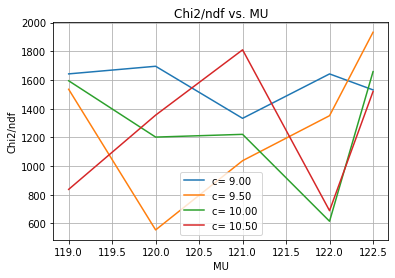

In [33]:
plt.figure()
for i in range(len(C)):
  plt.plot(MU,FullChi2[:,i]/300.0,label="c= %.2f" %(C[i]))
  plt.legend()
  plt.xlabel('MU')
  plt.ylabel('Chi2/ndf')
  plt.grid(True)
  plt.title("Chi2/ndf vs. MU")
plt.show()

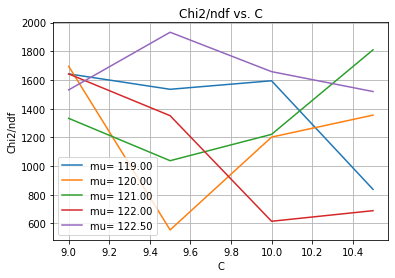

In [34]:
plt.figure()
for i in range(len(MU)):
  plt.plot(C,FullChi2[i,:]/300.0,label="mu= %.2f" %(MU[i]))
  plt.legend()
  plt.xlabel('C')
  plt.ylabel('Chi2/ndf')
  plt.grid(True)
  plt.title("Chi2/ndf vs. C")
plt.show()

In [37]:
'''F2=np.array([[431095.74523692, 466796.26329028, 435824.70572559,
        548571.77190686],
       [427672.22474051, 530993.19328672, 525475.55142104,
        601263.94219101],
       [322296.72950466, 409608.59361188, 610821.6657626 ,
        591590.37925199],
       [427577.64803895, 513049.04198829, 406669.73583795,
        621813.07143025],
       [347108.23946294, 496876.12603521, 488541.10286275,
        579391.52496324]])'''
F2

array([[431095.74523692, 466796.26329028, 435824.70572559,
        548571.77190686],
       [427672.22474051, 530993.19328672, 525475.55142104,
        601263.94219101],
       [322296.72950466, 409608.59361188, 610821.6657626 ,
        591590.37925199],
       [427577.64803895, 513049.04198829, 406669.73583795,
        621813.07143025],
       [347108.23946294, 496876.12603521, 488541.10286275,
        579391.52496324]])

In [44]:
'''F3=[[391933.95579426 381265.94419289 578069.61250979 570135.70015488]
 [433232.5217461  532760.88033111 527992.70437843 489302.33518404]
 [392503.23022278 480690.07043735 598925.5055873  505709.90715376]
 [432922.70234787 575605.09314471 531378.31522562 465789.05486645]
 [514921.29706781 485241.40530641 551663.00642901 528952.46811645]]'''

4

In [0]:
'''F4=[[465097.4648964  368719.66925022 459317.42274669 430830.41942655]
 [158936.75851868 176395.05361315 522858.96267547 461620.18897236]
 [239372.0577425  484506.28529235 265664.21322034 386493.33309159]
 [484829.99268883 515373.55769152 498846.97324127 417177.45474185]
 [449307.47701442 161485.91750375 329399.07425254 206965.99064645]]'''